In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
x_features = ['size(sqft)','bedrooms','floors','age']

print(f"x_train : {x_train} x_train_shape: {x_train.shape}")

x_train : [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]] x_train_shape: (3, 4)


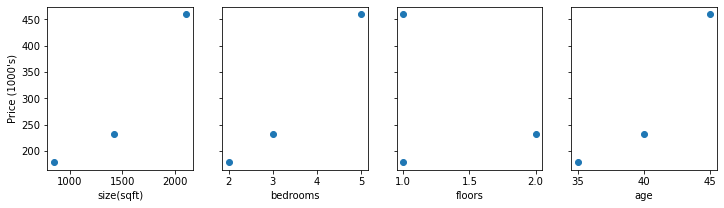

In [12]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [2]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
m=x_train.shape[0]
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)} m: {m}")

NameError: name 'np' is not defined

In [14]:
def predict(x, w, b):
    
    f_wb = np.dot(w, x) + b
    return f_wb

In [15]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost=0.0
    for i  in range(m):
        err=(predict(x[i],w,b)-y[i])**2
        cost+=err

    return cost/(2*m)

In [16]:
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros(n)
    dj_db=0
    for i in range(m):
        err=predict(x[i],w,b)-y[i]
        for j in range(n):
            dj_dw[j] += err * x[i,j]
        dj_db+=err
    
    dj_dw=dj_dw/m
    dj_db=dj_db/m

    return dj_dw,dj_db

In [17]:
def gradient_descent(x,y,w,b,alpha,iterations):
    j_hist=[]
    for i in range(iterations):
        dj_dw,dj_db=compute_gradient(x,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        
        if i<1000:
            j_hist.append(compute_cost(x,y,w,b))

    return w,b,j_hist

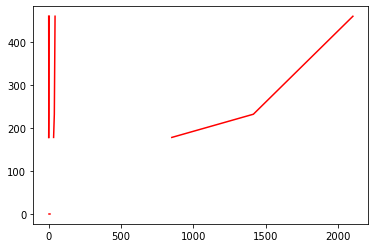

In [30]:
# # alpha = 5.0e-7
# iteration=10
# _,_,hist = gradient_descent(x_train, y_train,w_init,b_init,alpha,iteration)
# plt.plot(x_train,y_train,hist,c="r")
# plt.show()


In [32]:
# initial_w=np.zeros_like(w_init)
# b=0
alpha=alpha = 5.0e-7
iterations=10000
w_final,b_final,j_hist=gradient_descent(x_train,y_train,w_init,b_init,alpha,iterations)

# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

for i in range(m):
    print(f"prediction: {predict(x_train[i], w_final, b_final)} actual value: {y_train[i]}")

prediction: 460.00000001505407 actual value: 460
prediction: 231.99999999168585 actual value: 232
prediction: 177.99999997665566 actual value: 178


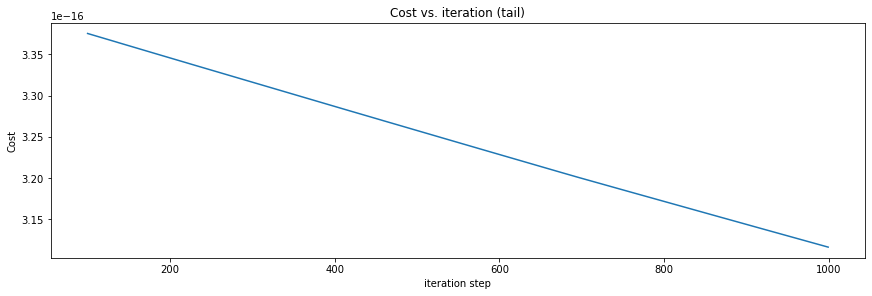

In [21]:
fig, (ax2) = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax2.plot(100 + np.arange(len(j_hist[100:])), j_hist[100:])
ax2.set_title("Cost vs. iteration (tail)")
ax2.set_ylabel('Cost') 
ax2.set_xlabel('iteration step') 
plt.show()

In [33]:
def zscore_normalize_features(X):
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

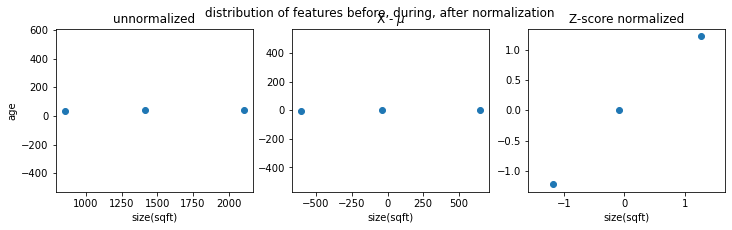

In [35]:
mu     = np.mean(x_train,axis=0)   
sigma  = np.std(x_train,axis=0) 
X_mean = (x_train - mu)
X_norm = (x_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(x_train[:,0], x_train[:,3])
ax[0].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3])
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3])
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()